# Comparing Machine Learning Models for Asthma Prediction


## Main goals:

- Wrangle Disease Data for Machine Learning
- Train and Compare Models' Performance


In [1]:
import numpy as np
import pandas as pd

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Uplpoading data from my python folder
# Note file directory
data = pd.read_csv('Disease_symptom_and_patient_profile_dataset.csv', sep=',')

In [3]:
# Viewing top 10 of the dataset
data.head(15)

,disease,fever,cough,fatigue,difficulty_breathing,age,gender,blood_pressure,cholesterol_level,outcome_variable
0,Influenza,Yes,No,Yes,Yes,19,Female,Low,Normal,Positive
1,Common Cold,No,Yes,Yes,No,25,Female,Normal,Normal,Negative
2,Eczema,No,Yes,Yes,No,25,Female,Normal,Normal,Negative
3,Asthma,Yes,Yes,No,Yes,25,Male,Normal,Normal,Positive
4,Asthma,Yes,Yes,No,Yes,25,Male,Normal,Normal,Positive
5,Eczema,Yes,No,No,No,25,Female,Normal,Normal,Positive
6,Influenza,Yes,Yes,Yes,Yes,25,Female,Normal,Normal,Positive
7,Influenza,Yes,Yes,Yes,Yes,25,Female,Normal,Normal,Positive
8,Hyperthyroidism,No,Yes,No,No,28,Female,Normal,Normal,Negative
9,Hyperthyroidism,No,Yes,No,No,28,Female,Normal,Normal,Negative


In [4]:
# Look at basic data discription including non numerical data values
data.describe(include='all').transpose()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
disease,349,116,Asthma,23,NaN,NaN,NaN,NaN,NaN,NaN,NaN
fever,349,2,Yes,175,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cough,349,2,No,182,NaN,NaN,NaN,NaN,NaN,NaN,NaN
fatigue,349,2,Yes,242,NaN,NaN,NaN,NaN,NaN,NaN,NaN
difficulty_breathing,349,2,No,261,NaN,NaN,NaN,NaN,NaN,NaN,NaN
age,349.0,NaN,NaN,NaN,46.323782,13.08509,19.0,35.0,45.0,55.0,90.0
gender,349,2,Female,176,NaN,NaN,NaN,NaN,NaN,NaN,NaN
blood_pressure,349,3,High,167,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cholesterol_level,349,3,High,166,NaN,NaN,NaN,NaN,NaN,NaN,NaN
outcome_variable,349,2,Positive,186,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Extracting Asthma Dataset

In [5]:
# First mask all other data except asthma
mask= data.disease== 'Asthma'
# Get asthma data
asthma = data[mask]
asthma.head(10)

,disease,fever,cough,fatigue,difficulty_breathing,age,gender,blood_pressure,cholesterol_level,outcome_variable
3,Asthma,Yes,Yes,No,Yes,25,Male,Normal,Normal,Positive
4,Asthma,Yes,Yes,No,Yes,25,Male,Normal,Normal,Positive
10,Asthma,Yes,No,No,Yes,28,Male,High,Normal,Positive
34,Asthma,Yes,Yes,No,Yes,30,Female,Normal,Normal,Positive
35,Asthma,Yes,Yes,No,Yes,30,Female,Normal,Normal,Positive
36,Asthma,Yes,Yes,Yes,Yes,30,Female,Normal,Normal,Positive
50,Asthma,No,No,No,Yes,31,Male,Normal,Low,Negative
56,Asthma,No,Yes,Yes,Yes,35,Female,Normal,High,Negative
57,Asthma,Yes,Yes,Yes,Yes,35,Female,Normal,Normal,Negative
58,Asthma,No,Yes,Yes,Yes,35,Female,High,Normal,Negative


## Converting all neccesary non-numerical values into numerical values 

In [6]:
a= {'No':0, 'Yes':1} # declare dictionary a

#mapping values 0 and 1 to No and Yes respectively in fever, cough, and difficulty_breathing data columns
asthma['fever1']=asthma['fever'].map(a) 
asthma['cough1']=asthma['cough'].map(a)
asthma['fatigue1']=asthma['fatigue'].map(a)
asthma['difficulty_breathing1']=asthma['difficulty_breathing'].map(a)

# declare dictionaries b and c
b= {'Low': 1, 'Normal': 2, 'High': 3}
c= {'Negative': 0, 'Positive': 1}

#mapping values 1, 2 and 3 to Low, Normal, and High respectively in blood_pressure and cholesterol_level data columns

asthma['blood_pressure1']= asthma['blood_pressure'].map(b)
asthma['cholesterol_level1']= asthma['cholesterol_level'].map(b)

#mapping values 0 and 1 to Negative, and Positive respectively in outcome_variable data column

asthma['outcome_variable1']= asthma['outcome_variable'].map(c)

asthma.head(10)

,disease,fever,cough,fatigue,difficulty_breathing,age,gender,blood_pressure,cholesterol_level,outcome_variable,fever1,cough1,fatigue1,difficulty_breathing1,blood_pressure1,cholesterol_level1,outcome_variable1
3,Asthma,Yes,Yes,No,Yes,25,Male,Normal,Normal,Positive,1,1,0,1,2,2,1
4,Asthma,Yes,Yes,No,Yes,25,Male,Normal,Normal,Positive,1,1,0,1,2,2,1
10,Asthma,Yes,No,No,Yes,28,Male,High,Normal,Positive,1,0,0,1,3,2,1
34,Asthma,Yes,Yes,No,Yes,30,Female,Normal,Normal,Positive,1,1,0,1,2,2,1
35,Asthma,Yes,Yes,No,Yes,30,Female,Normal,Normal,Positive,1,1,0,1,2,2,1
36,Asthma,Yes,Yes,Yes,Yes,30,Female,Normal,Normal,Positive,1,1,1,1,2,2,1
50,Asthma,No,No,No,Yes,31,Male,Normal,Low,Negative,0,0,0,1,2,1,0
56,Asthma,No,Yes,Yes,Yes,35,Female,Normal,High,Negative,0,1,1,1,2,3,0
57,Asthma,Yes,Yes,Yes,Yes,35,Female,Normal,Normal,Negative,1,1,1,1,2,2,0
58,Asthma,No,Yes,Yes,Yes,35,Female,High,Normal,Negative,0,1,1,1,3,2,0


## Selecting numerical columns from non numerical columns

In [7]:
asthma_data = asthma[['fever1', 'cough1', 
                          'fatigue1', 'difficulty_breathing1', 'age', 
                         'blood_pressure1', 'cholesterol_level1', 
                          'outcome_variable1']]
asthma_data.head(10)

,fever1,cough1,fatigue1,difficulty_breathing1,age,blood_pressure1,cholesterol_level1,outcome_variable1
3,1,1,0,1,25,2,2,1
4,1,1,0,1,25,2,2,1
10,1,0,0,1,28,3,2,1
34,1,1,0,1,30,2,2,1
35,1,1,0,1,30,2,2,1
36,1,1,1,1,30,2,2,1
50,0,0,0,1,31,2,1,0
56,0,1,1,1,35,2,3,0
57,1,1,1,1,35,2,2,0
58,0,1,1,1,35,3,2,0


In [8]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

## Heat Map to Show Correlation Between Variables

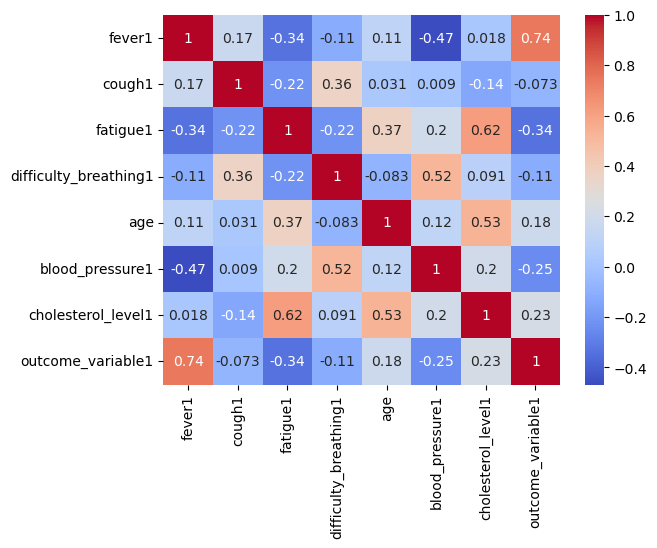

In [9]:
sns.heatmap(asthma_data.corr(), annot=True, cmap='coolwarm')
plt.show()

## Extracting data to be used for training model

In [10]:
finalData = asthma[[ 'fever1', 'cough1', 
            'fatigue1', 'difficulty_breathing1', 'age',
            'blood_pressure1', 'cholesterol_level1', 
            'outcome_variable']]
finalData.head(10)

,fever1,cough1,fatigue1,difficulty_breathing1,age,blood_pressure1,cholesterol_level1,outcome_variable
3,1,1,0,1,25,2,2,Positive
4,1,1,0,1,25,2,2,Positive
10,1,0,0,1,28,3,2,Positive
34,1,1,0,1,30,2,2,Positive
35,1,1,0,1,30,2,2,Positive
36,1,1,1,1,30,2,2,Positive
50,0,0,0,1,31,2,1,Negative
56,0,1,1,1,35,2,3,Negative
57,1,1,1,1,35,2,2,Negative
58,0,1,1,1,35,3,2,Negative


## Importing Necessary Libraries for Model Training and Prediction

In [11]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC,SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split,cross_validate
from sklearn.preprocessing import MinMaxScaler, StandardScaler, OneHotEncoder

## Encoding Target Variable (outcome_variable)

In [12]:
from sklearn.preprocessing import OneHotEncoder

# Create an instance of the OneHotEncoder
one_hot_encoder = OneHotEncoder()

# Fit and transform the encoder on the 'outcome_variable' column
outcome_encoded = one_hot_encoder.fit_transform(finalData[['outcome_variable']])

# Convert the sparse matrix to a dense array
outcome_encoded_array = outcome_encoded.toarray()

# Create new column(s) for the one-hot encoding in the DataFrame
encoded_columns = one_hot_encoder.get_feature_names_out(['outcome_variable'])
finalData[encoded_columns] = outcome_encoded_array

In [13]:
finalData.head(10)

,fever1,cough1,fatigue1,difficulty_breathing1,age,blood_pressure1,cholesterol_level1,outcome_variable,outcome_variable_Negative,outcome_variable_Positive
3,1,1,0,1,25,2,2,Positive,0.0,1.0
4,1,1,0,1,25,2,2,Positive,0.0,1.0
10,1,0,0,1,28,3,2,Positive,0.0,1.0
34,1,1,0,1,30,2,2,Positive,0.0,1.0
35,1,1,0,1,30,2,2,Positive,0.0,1.0
36,1,1,1,1,30,2,2,Positive,0.0,1.0
50,0,0,0,1,31,2,1,Negative,1.0,0.0
56,0,1,1,1,35,2,3,Negative,1.0,0.0
57,1,1,1,1,35,2,2,Negative,1.0,0.0
58,0,1,1,1,35,3,2,Negative,1.0,0.0


## Selecting Best Features For Our Model Using Chi2

In [14]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [15]:
# Separate the features (X) and the target variable (y)
X = finalData.drop(columns=['outcome_variable', 'outcome_variable_Negative', 'outcome_variable_Positive'])
y = finalData['outcome_variable']

# Define the number of top features you want to select
k = 7  # Adjust this value to the number of features you want to select

# Create an instance of SelectKBest with the chi2 scoring function
bestfeatures = SelectKBest(score_func=chi2, k=7)

# Fit and transform the selector on your feature data
fit = bestfeatures.fit_transform(X, y)

# Get the selected feature indices
selected_feature_indices = bestfeatures.get_support(indices=True)

# Get the names of the selected features
selected_features = X.columns[selected_feature_indices]

# Get the chi2 scores for the selected features
chi2_scores = bestfeatures.scores_[selected_feature_indices]

# Print the selected feature names and their chi2 scores
for feature, score in zip(selected_features, chi2_scores):
    print(f"Feature: {feature}, Chi2 Score: {score}")

Feature: fever1, Chi2 Score: 2.7709876543209875
Feature: cough1, Chi2 Score: 0.0320261437908497
Feature: fatigue1, Chi2 Score: 1.3828282828282832
Feature: difficulty_breathing1, Chi2 Score: 0.01262626262626268
Feature: age, Chi2 Score: 1.2739693757361605
Feature: blood_pressure1, Chi2 Score: 0.15022222222222215
Feature: cholesterol_level1, Chi2 Score: 0.13616557734204773


In [16]:
# The index of the selected features
selected_feature_indices

array([0, 1, 2, 3, 4, 5, 6], dtype=int64)

In [17]:
# Selected Features
selected_features

Index(['fever1', 'cough1', 'fatigue1', 'difficulty_breathing1', 'age',
       'blood_pressure1', 'cholesterol_level1'],
      dtype='object')

In [18]:
# Chi2 Values
chi2_scores

array([2.77098765, 0.03202614, 1.38282828, 0.01262626, 1.27396938,
       0.15022222, 0.13616558])

## Model Training

Various models to be used in the training are:
- Logistic Regression
- Linear SVC
- Polynomial SVC
- Decision Tree Classifier

In [19]:
X = finalData[selected_features] #independent varibales = the selected features
y = finalData['outcome_variable'] # dependent variable = outcome variable (positive/negative)


# Fit data into models for training and testing. 70:30% train:test ratio used.
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=42)

models=[LogisticRegression(),
       LinearSVC(),
       SVC(kernel='poly'),
       DecisionTreeClassifier()]

## Models Evaluation

In [20]:
from sklearn.metrics import accuracy_score  # Import the accuracy_score function

# Determining accuracy of models used using accuracy score function
model_names=['LogisticRegression',
            'LinearSVM',
            'Polynomial',
            'DecisionTree']

acc=[]
eval_acc={}

for model in range(len(models)):
    classification_model=models[model]
    classification_model.fit(x_train,y_train)
    pred=classification_model.predict(x_test)
    acc.append(accuracy_score(pred,y_test))
    
eval_acc={'Modeling Algorithm': model_names, 'Accuracy': acc}
eval_acc

{'Modeling Algorithm': ['LogisticRegression',
  'LinearSVM',
  'Polynomial',
  'DecisionTree'],
 'Accuracy': [0.7142857142857143,
  0.8571428571428571,
  0.7142857142857143,
  0.8571428571428571]}

In [21]:
# Creating a data frame for the accuracy results of the models used

acc_table = pd.DataFrame(eval_acc)
acc_table= acc_table.sort_values(by='Accuracy', ascending=[False]);
acc_table

,Modeling Algorithm,Accuracy
1,LinearSVM,0.857143
3,DecisionTree,0.857143
0,LogisticRegression,0.714286
2,Polynomial,0.714286


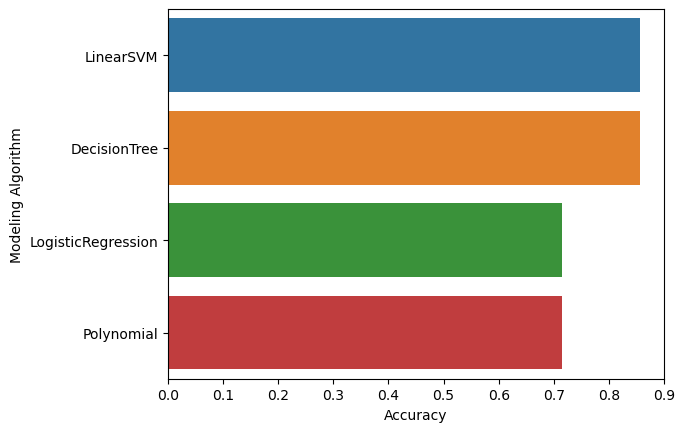

In [22]:
# Visualizing accuracy of models using barplot
sns.barplot(y= 'Modeling Algorithm', x= 'Accuracy', data=acc_table);

## Conclusion

In conclusion, this project aimed to predict asthma using machine learning models based on a dataset containing symptoms and patient profiles. Several key steps were undertaken, including data wrangling, feature engineering, model training, and evaluation. Here are the key insights and conclusions drawn from the project:

### Data Understanding and Preparation:

The initial exploration of the dataset revealed essential information about the features and their distribution. Non-numerical values were appropriately converted into numerical values, ensuring compatibility with machine learning models. A subset of the data focusing on asthma cases was extracted for further analysis.

### Feature Selection and Engineering:

- Chi-squared statistical tests were employed for feature selection, identifying the most relevant features for predicting asthma.

- The heatmap visualization provided insights into the correlations between different variables, aiding in feature selection decisions.

### Model Training and Evaluation:

- Four machine learning models:
   1. Logistic Regression, 
   2. Linear Support Vector Classifier (LinearSVC), 
   3. Polynomial Support Vector Classifier (SVC), and
   4. Decision Tree Classifier were trained and evaluated.
   

- LinearSVC and Decision Tree models emerged as the top performers, demonstrating the highest accuracy in predicting asthma.

- The evaluation metric used was accuracy, which provided a clear comparison of the models' overall predictive performance.

### Visualization and Interpretation:

- A bar plot was utilized to visually compare the accuracy of each model, offering a quick and effective way to assess their relative performance.

### Future Considerations:

- While accuracy is a valuable metric, future iterations of the project could explore additional evaluation metrics, especially in the context of imbalanced datasets.

- Hyperparameter tuning and cross-validation could be implemented to fine-tune model performance and provide a more robust assessment.

### Limitations and Further Research:

- The project's findings are contingent on the quality and representativeness of the dataset. Further research could involve obtaining a more diverse and extensive dataset.
- Exploring the interpretability of models and the clinical relevance of selected features could enhance the project's applicability in a healthcare context.


In summary, Decision Tree and LinearSVC models demonstrated promising results in predicting asthma based on the provided dataset. This project lays the foundation for further research and applications in the realm of disease prediction using machine learning. Continued refinement of models and consideration of additional factors could contribute to the development of reliable and interpretable tools for asthma prediction and, potentially, other medical conditions.